In [142]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

In [143]:
data = pd.read_csv('50_Startups.csv')

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [145]:
data.rename(columns={'R&D Spend':'rndspend','Administration':'admin', 'Marketing Spend':'mktspend','State':'state','Profit':'profit'}, inplace = True)
data.head()

,rndspend,admin,mktspend,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [146]:
data.describe()

,rndspend,admin,mktspend,profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [152]:
data.corr(numeric_only=True)

,rndspend,admin,mktspend,profit
rndspend,1.000000,0.241955,0.724248,0.972900
admin,0.241955,1.000000,-0.032154,0.200717
mktspend,0.724248,-0.032154,1.000000,0.747766
profit,0.972900,0.200717,0.747766,1.000000


<Axes: >

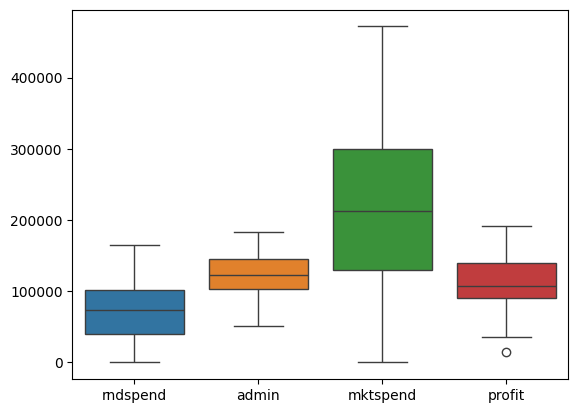

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(data=data)

In [148]:
data['state'].value_counts()

state
New York      17
California    17
Florida       16
Name: count, dtype: int64

In [149]:
df = pd.DataFrame(data)

# One-hot encode the 'state' column and drop the first level to avoid multicollinearity
df = pd.get_dummies(df, columns=['state'], drop_first=True)
df = df.astype(int)
print(df.head())

   rndspend   admin  mktspend  profit  state_Florida  state_New York
0    165349  136897    471784  192261              0               1
1    162597  151377    443898  191792              0               0
2    153441  101145    407934  191050              1               0
3    144372  118671    383199  182901              0               1
4    142107   91391    366168  166187              1               0


In [150]:
df.rename(columns={'state_Florida': 'stfl', 'state_New York': 'stny'}, inplace=True)
print(df.head())

   rndspend   admin  mktspend  profit  stfl  stny
0    165349  136897    471784  192261     0     1
1    162597  151377    443898  191792     0     0
2    153441  101145    407934  191050     1     0
3    144372  118671    383199  182901     0     1
4    142107   91391    366168  166187     1     0


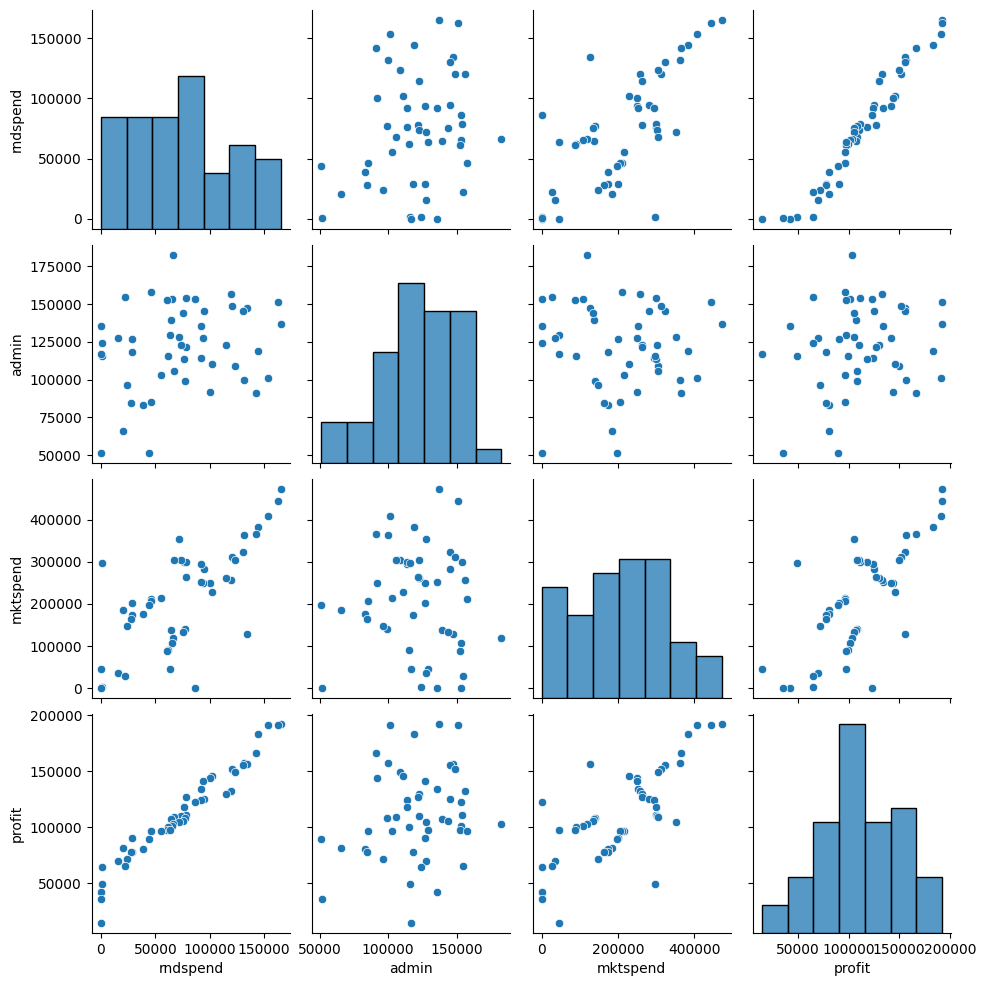

In [154]:
sns.pairplot(data)
plt.show()

# Preaparing Model

## using statsmodels

In [162]:
#Bulding model

model = smf.ols('profit~rndspend+admin+mktspend+stfl+stny',data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           1.34e-27
Time:                        19:45:02   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.013e+04   6884.836      7.281      0.0

In [163]:
#Bulding model

model = smf.ols('profit~rndspend+admin+mktspend+stfl',data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           8.49e-29
Time:                        19:45:21   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.011e+04   6647.884      7.537      0.0

In [164]:
#Bulding model

model = smf.ols('profit~rndspend+admin+mktspend+stny',data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           8.50e-29
Time:                        19:45:44   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.018e+04   6747.639      7.437      0.0

In [165]:
# above model says only R&D Spend (p_value < 0.05) is significant. 
# Marketing Spend , Administration, State_FLORIDA and State_NEW YORK all are having p_value > 0.05, says they are not significant. 

In [166]:
### having state columns as predictors has no significance. So, can be dropped.

# simple linear regression models
## build models each predictor vs response 

In [167]:
# Define the formula for each predictor
formulas = {
    'rndspend': 'profit ~ rndspend',
    'admin': 'profit ~ admin',
    'mktspend': 'profit ~ mktspend',
    'stfl': 'profit ~ stfl',
    'stny': 'profit ~ stny'
}

# Initialize a dictionary to store models
models = {}

# Iterate over each predictor and build the model
for col, formula in formulas.items():
    model_eip = smf.ols(formula=formula, data=df).fit()
    models[col] = model_eip

# Print the summary of each model
for col, model_eip in models.items():
    print(f"Predictor: {col}")
    print(model_eip.summary())
    print('\n')


Predictor: rndspend
                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           3.50e-32
Time:                        19:47:26   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.895

In [103]:
import pandas as pd

# Initialize lists to store the results
results = []

# Iterate over each model
for col, model_eip in models.items():
    # Extract relevant statistics
    r_squared = model_eip.rsquared
    adj_r_squared = model_eip.rsquared_adj
    p_value = model_eip.pvalues.iloc[1]  # Accessing p-value by position
    t_value = model_eip.tvalues.iloc[1]  # Accessing t-value by position
    
    # Append results to the list
    results.append({
        'Predictor': col,
        'R-squared': r_squared,
        'Adjusted R-squared': adj_r_squared,
        'P-value': p_value,
        'T-value': t_value
    })

# Create DataFrame from results
results_df = pd.DataFrame(results)

print(results_df)


  Predictor  R-squared  Adjusted R-squared       P-value    T-value
0  rndspend   0.946535            0.945421  3.501061e-32  29.151004
1     admin   0.040286            0.020292  1.622216e-01   1.419478
2  mktspend   0.559154            0.549970  4.380956e-10   7.802665
3      stfl   0.013512           -0.007040  4.214553e-01   0.810848
4      stny   0.000984           -0.019829  8.287873e-01   0.217440


In [104]:
### R&D Spend and Marketing Spend are having p_value < 0.05, says both are very much significant.

In [105]:
### administration, State_FLORIDA and Stae_NEW YORK have p_value > 0.05. So, they are less significant.

In [168]:
model_rndspend_mktspend = smf.ols('profit~rndspend+mktspend+admin', data = df).fit()
model_rndspend_mktspend.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           4.53e-30
Time:                        19:48:22   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.366      7.626      0.000    3.69e+04    6.34e+04
rndspend       0.8057      0.045     17.846      0.000       0.715       0.897
mktspend       0.0272      0.016      1.655      0.105      -0.006       0.060
admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
==============================================================================
Omnibus:                       14.839   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.443
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.587   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
# Marketing Spend and R&D Spend are independently significant. But, together they have a problem.

# since , both are having high positive correlation between themselves.


In [169]:
model_admin_stfl_stny = smf.ols('profit~admin+rndspend', data = df).fit()
model_admin_stfl_stny.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           7.29e-31
Time:                        19:53:27   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.489e+04   6016.724      9.122      0.000    4.28e+04     6.7e+04
admin         -0.0530      0.049     -1.073      0.289      -0.152       0.046
rndspend       0.8621      0.030     28.589      0.000       0.801       0.923
==============================================================================
Omnibus:                       14.679   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.451
Skew:                          -0.961   Prob(JB):                     3.62e-05
Kurtosis:                       5.474   Cond. No.                     6.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [170]:
model_admin_stfl_stny = smf.ols('profit~admin+mktspend', data = df).fit()
model_admin_stfl_stny.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           2.50e-10
Time:                        19:53:45   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
admin          0.3237      0.131      2.468      0.017       0.060       0.588
mktspend       0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.525
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [171]:
model_admin_stfl_stny = smf.ols('profit~mktspend+rndspend', data = df).fit()
model_admin_stfl_stny.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           2.16e-31
Time:                        19:54:16   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.934     17.464      0.000    4.16e+04    5.24e+04
mktspend       0.0299      0.016      1.927      0.060      -0.001       0.061
rndspend       0.7966      0.041     19.265      0.000       0.713       0.880
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.162
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [109]:
## it is evident that administartion, Stae_FLORIDA and State_NEW YORK have no significance in building the model

In [172]:
# multiple combinations of rndspend, mktspend and admin says there is no significance of admin. 

In [173]:
# mktspend and rndspend also have strong positive correlation. most of th einformation is explained by the rndspend. 

# calulating VIF

In [110]:
import statsmodels.formula.api as smf

# Calculate VIF for rndspend
rsq_rndspend = smf.ols('rndspend ~ admin + mktspend + stfl + stny', data=df).fit().rsquared
vif_rndspend = 1 / (1 - rsq_rndspend)
print("VIF for rndspend:", vif_rndspend)

# Calculate VIF for admin
rsq_admin = smf.ols('admin ~ rndspend + mktspend + stfl + stny', data=df).fit().rsquared
vif_admin = 1 / (1 - rsq_admin)
print("VIF for admin:", vif_admin)

# Calculate VIF for mktspend
rsq_mktspend = smf.ols('mktspend ~ rndspend + admin + stfl + stny', data=df).fit().rsquared
vif_mktspend = 1 / (1 - rsq_mktspend)
print("VIF for mktspend:", vif_mktspend)

# Calculate VIF for stfl
rsq_stfl = smf.ols('stfl ~ rndspend + admin + mktspend + stny', data=df).fit().rsquared
vif_stfl = 1 / (1 - rsq_stfl)
print("VIF for stfl:", vif_stfl)

# Calculate VIF for stny
rsq_stny = smf.ols('stny ~ rndspend + admin + mktspend + stfl', data=df).fit().rsquared
vif_stny = 1 / (1 - rsq_stny)
print("VIF for stny:", vif_stny)


VIF for rndspend: 2.4955114082288534
VIF for admin: 1.1777666267596272
VIF for mktspend: 2.416798507129614
VIF for stfl: 1.3876411304968166
VIF for stny: 1.3350613018204125


# Residual Analysis

## Test for normality of Residuals (Q-Q plot)

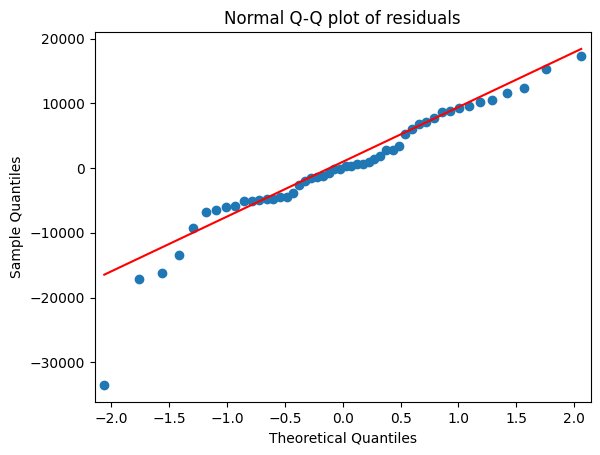

In [111]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [129]:
list(np.where(model.resid<-20000))

[array([49], dtype=int64)]

# Residual plot for homoscedasticity

In [113]:
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

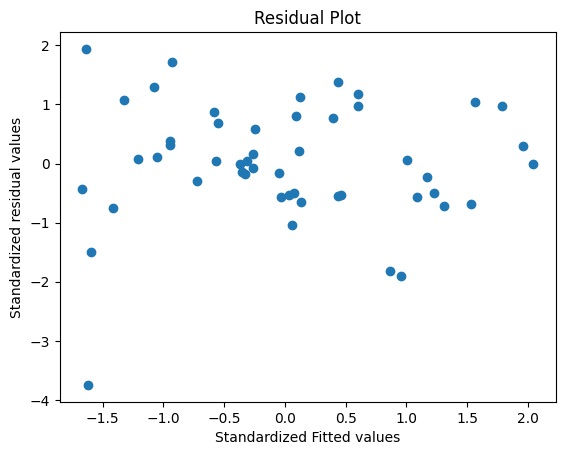

In [114]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [190]:
#index and value of influencer
(np.argmin(get_standardized_values(model.resid)),np.min(get_standardized_values(model.resid)))

(49, -3.753769522329263)

# Residual vs Regressors

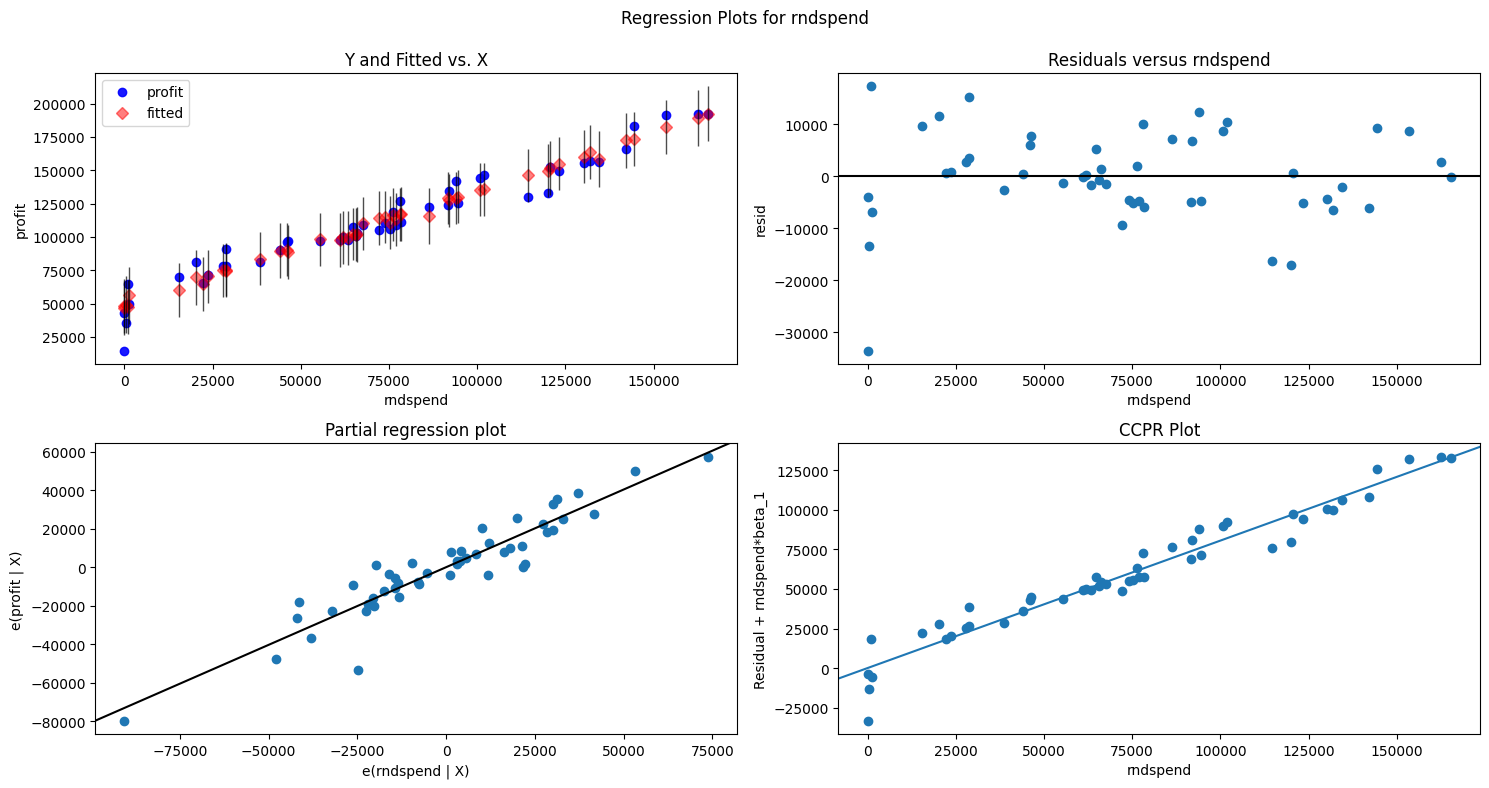

In [115]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "rndspend", fig=fig)
plt.show()

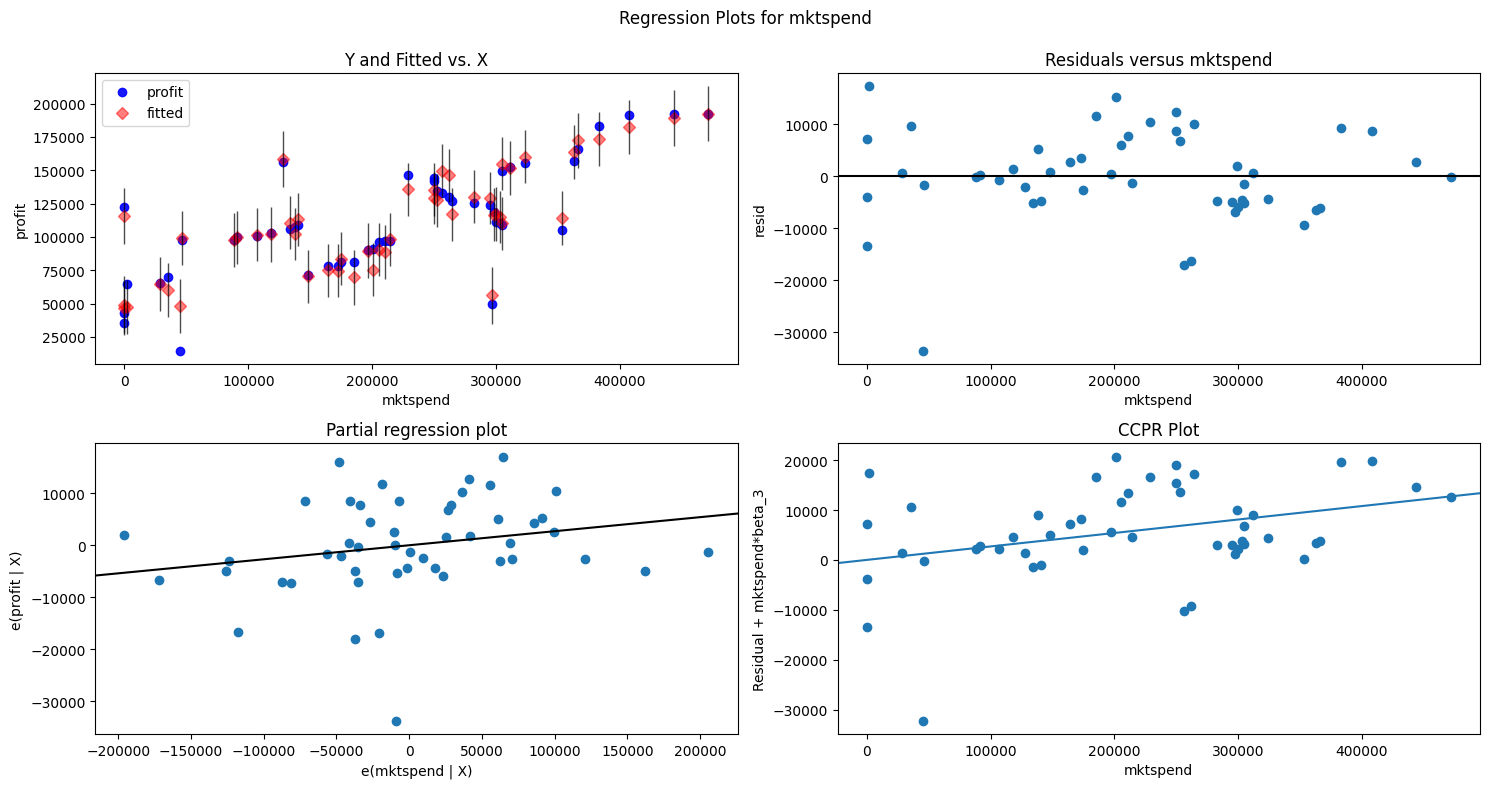

In [116]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "mktspend", fig=fig)
plt.show()

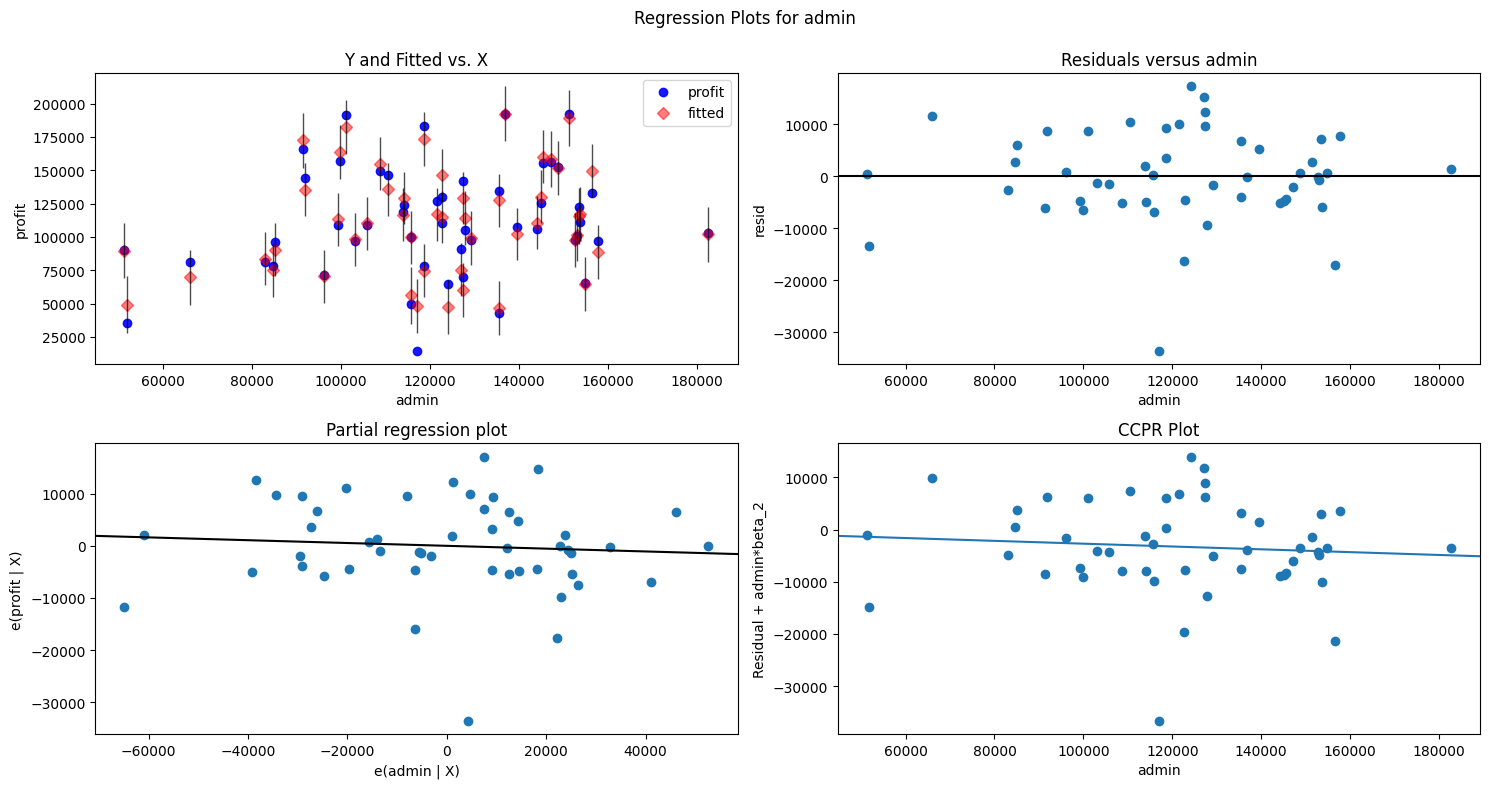

In [117]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "admin", fig=fig)
plt.show()

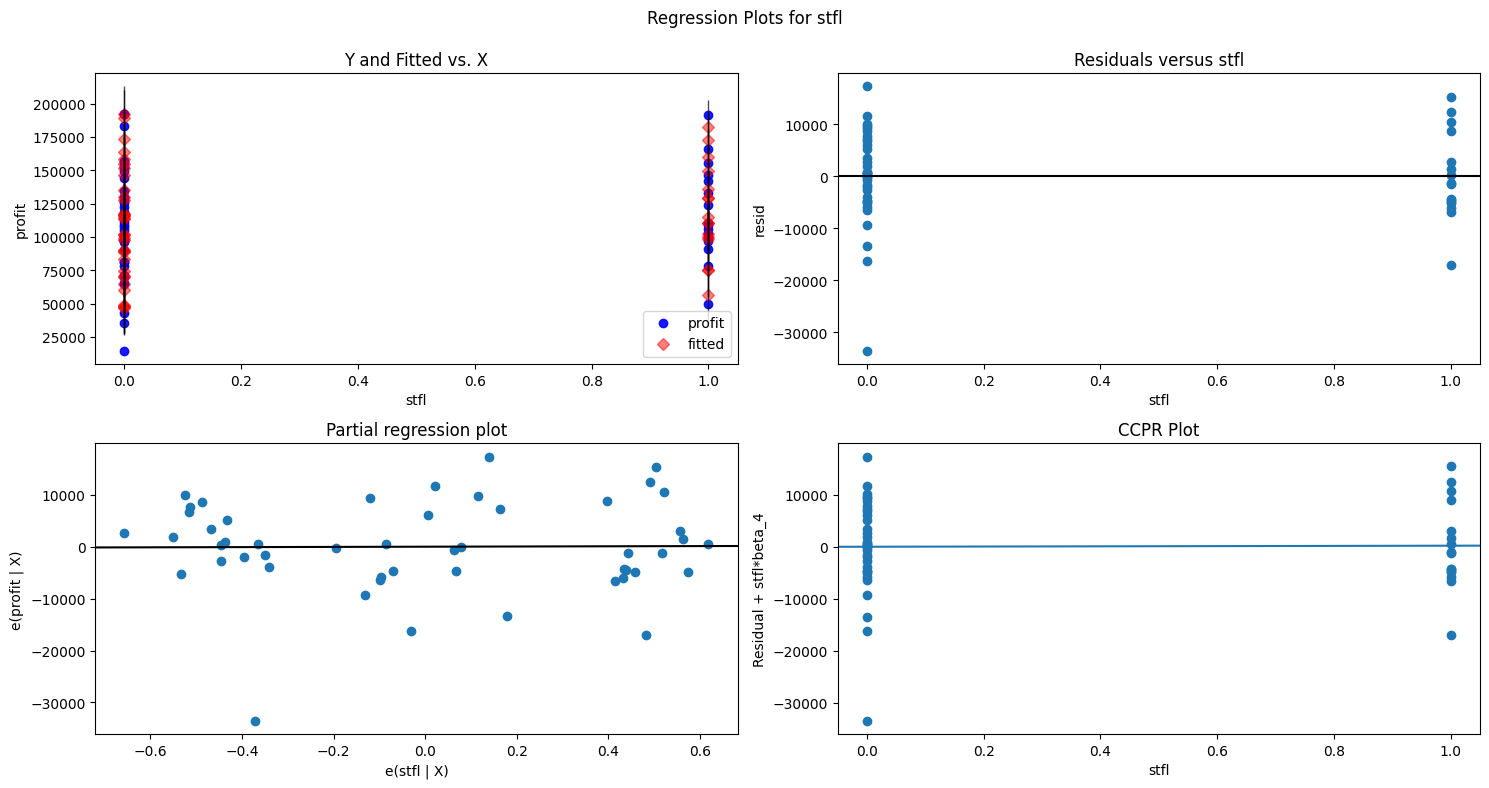

In [118]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "stfl", fig=fig)
plt.show()

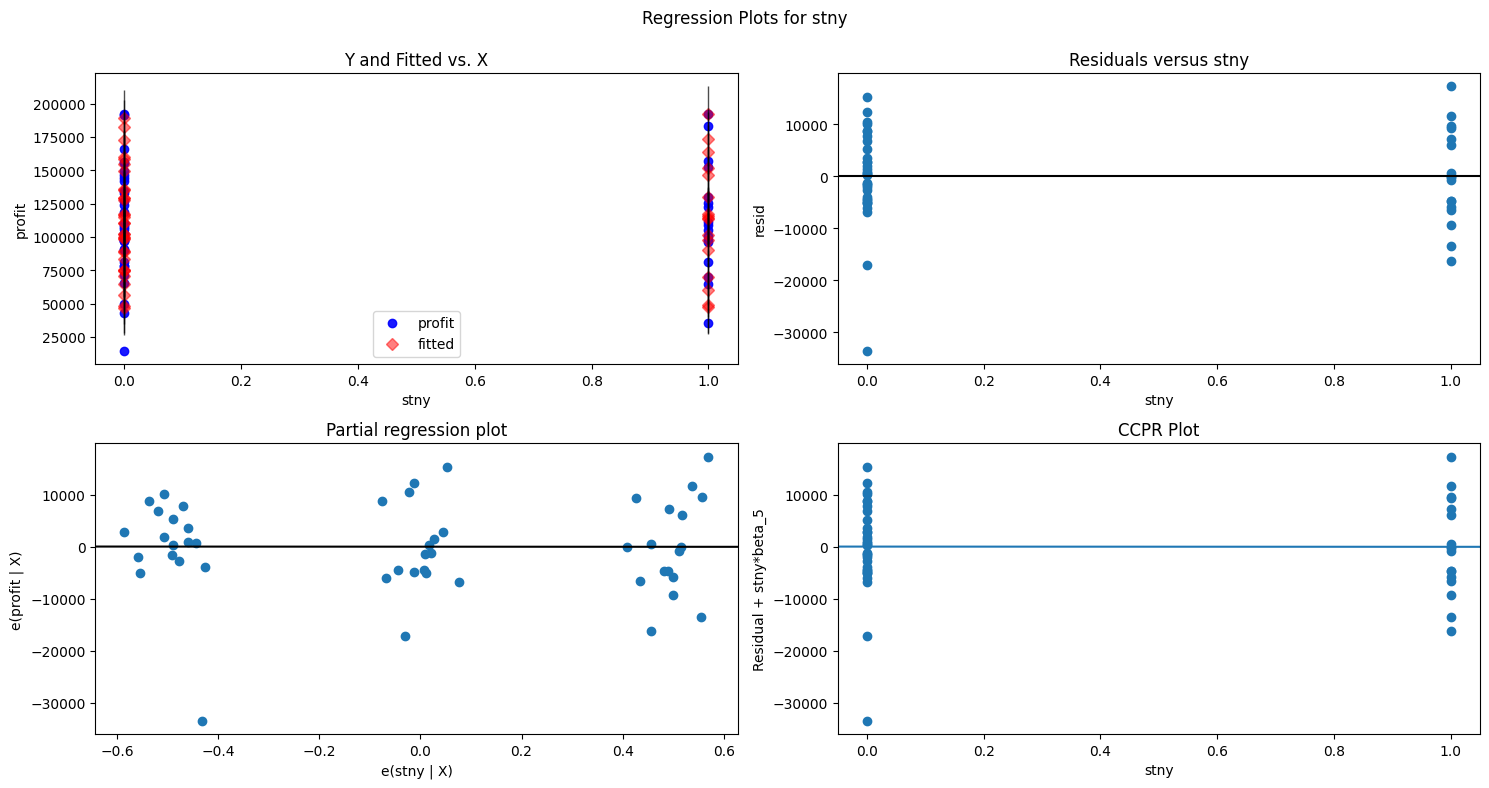

In [119]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "stny", fig=fig)
plt.show()

# model deletion diagnostics

## detecting influencers/outliers

## cook's distance

In [120]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

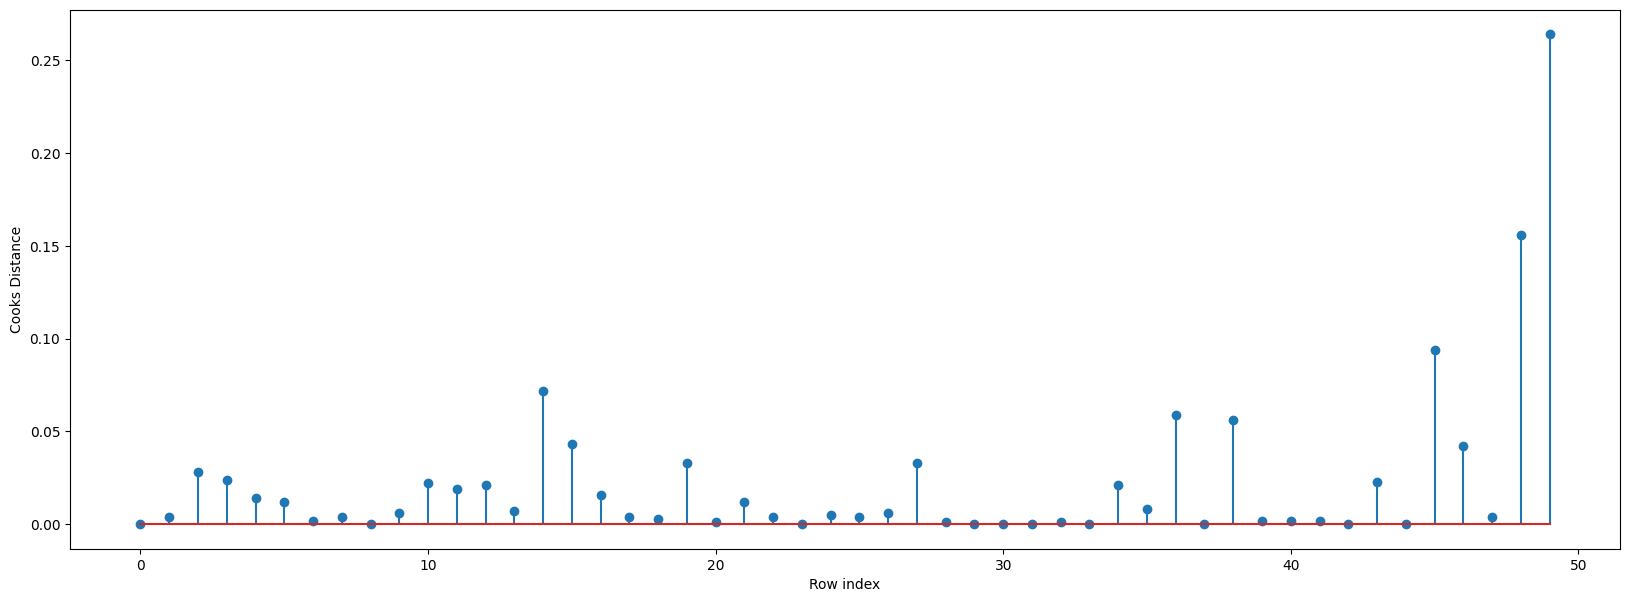

In [121]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [122]:
#index and value of influencer
(np.argmax(c),np.max(c))

(49, 0.2639608191172165)

# high influence points

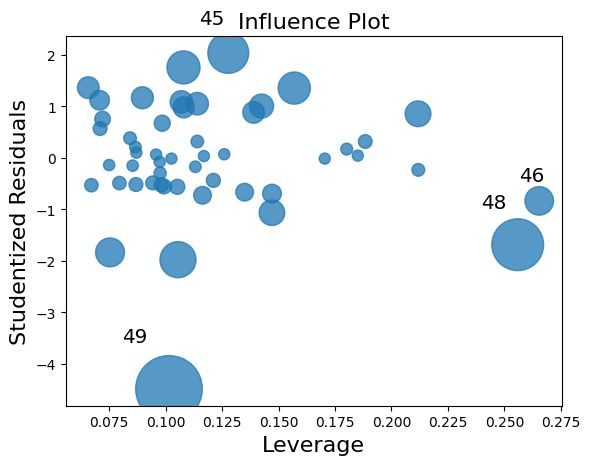

In [123]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [176]:
k = 3
n = df.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff 

0.24

In [177]:
## from the above plot, it is evident that data points 49 is an influencer

In [179]:
df[df.index.isin([49])]

,rndspend,admin,mktspend,profit,stfl,stny
49,0,116983,45173,14681,0,0


In [180]:
df.head()

,rndspend,admin,mktspend,profit,stfl,stny
0,165349,136897,471784,192261,0,1
1,162597,151377,443898,191792,0,0
2,153441,101145,407934,191050,1,0
3,144372,118671,383199,182901,0,1
4,142107,91391,366168,166187,1,0


# improving the model

In [182]:
df_new = df.copy()
df_new.head()

,rndspend,admin,mktspend,profit,stfl,stny
0,165349,136897,471784,192261,0,1
1,162597,151377,443898,191792,0,0
2,153441,101145,407934,191050,1,0
3,144372,118671,383199,182901,0,1
4,142107,91391,366168,166187,1,0


In [183]:
df1 = df_new.drop(df_new.index[[49]],axis=0).reset_index()

In [185]:
df1=df1.drop(['index'],axis=1)
df1

,rndspend,admin,mktspend,profit,stfl,stny
0,165349,136897,471784,192261,0,1
1,162597,151377,443898,191792,0,0
2,153441,101145,407934,191050,1,0
3,144372,118671,383199,182901,0,1
4,142107,91391,366168,166187,1,0
5,131876,99814,362861,156991,0,1
6,134615,147198,127716,156122,0,0
7,130298,145530,323876,155752,1,0
8,120542,148718,311613,152211,0,1
9,123334,108679,304981,149759,0,0


In [125]:
## log tranform can't be applied to rndspend and mktspend as they are having values equals to zero. 

# build model

In [191]:
model1 = smf.ols('profit~rndspend+mktspend+admin+stfl+stny', data = df1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     216.6
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           2.51e-29
Time:                        21:18:40   Log-Likelihood:                -505.97
No. Observations:                  49   AIC:                             1024.
Df Residuals:                      43   BIC:                             1035.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.338e+04   5794.236      9.212      0.000    4.17e+04    6.51e+04
rndspend       0.7836      0.039     20.056      0.000       0.705       0.862
mktspend       0.0258      0.014      1.804      0.078      -0.003       0.055
admin         -0.0220      0.044     -0.505      0.616      -0.110       0.066
stfl       -1564.4052   2842.017     -0.550      0.585   -7295.878    4167.068
stny       -1954.0692   2751.933     -0.710      0.481   -7503.870    3595.732
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.207
Skew:                           0.061   Prob(JB):                        0.902
Kurtosis:                       2.705   Cond. No.                     1.46e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [192]:
model1 = smf.ols('profit~rndspend+mktspend+admin+stfl', data = df1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     273.7
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           1.82e-30
Time:                        21:19:00   Log-Likelihood:                -506.25
No. Observations:                  49   AIC:                             1023.
Df Residuals:                      44   BIC:                             1032.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.243e+04   5606.116      9.352      0.000    4.11e+04    6.37e+04
rndspend       0.7823      0.039     20.159      0.000       0.704       0.860
mktspend       0.0258      0.014      1.816      0.076      -0.003       0.055
admin         -0.0217      0.043     -0.501      0.619      -0.109       0.066
stfl        -548.1717   2441.491     -0.225      0.823   -5468.673    4372.329
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.601
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.183
Skew:                          -0.068   Prob(JB):                        0.913
Kurtosis:                       2.733   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [193]:
model1 = smf.ols('profit~rndspend+mktspend+admin+stny', data = df1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     275.0
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           1.64e-30
Time:                        21:19:11   Log-Likelihood:                -506.14
No. Observations:                  49   AIC:                             1022.
Df Residuals:                      44   BIC:                             1032.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.291e+04   5684.801      9.307      0.000    4.15e+04    6.44e+04
rndspend       0.7847      0.039     20.269      0.000       0.707       0.863
mktspend       0.0245      0.014      1.751      0.087      -0.004       0.053
admin         -0.0229      0.043     -0.529      0.599      -0.110       0.064
stny       -1191.2438   2358.629     -0.505      0.616   -5944.748    3562.261
==============================================================================
Omnibus:                        0.041   Durbin-Watson:                   1.634
Prob(Omnibus):                  0.980   Jarque-Bera (JB):                0.224
Skew:                          -0.024   Prob(JB):                        0.894
Kurtosis:                       2.672   Cond. No.                     1.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [197]:
model1 = smf.ols('profit~rndspend+mktspend+admin', data = df1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           8.85e-32
Time:                        21:21:52   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.655      9.451      0.000    4.12e+04    6.35e+04
rndspend       0.7830      0.038     20.469      0.000       0.706       0.860
mktspend       0.0252      0.014      1.825      0.075      -0.003       0.053
admin         -0.0222      0.043     -0.518      0.607      -0.109       0.064
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [198]:
model1 = smf.ols('profit~rndspend+mktspend', data = df1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           3.74e-33
Time:                        21:21:53   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.979e+04   2341.579     21.261      0.000    4.51e+04    5.45e+04
rndspend       0.7754      0.035     22.136      0.000       0.705       0.846
mktspend       0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [199]:
model1 = smf.ols('profit~rndspend', data = df1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1055.
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           7.56e-34
Time:                        21:22:15   Log-Likelihood:                -508.68
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      47   BIC:                             1025.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.172e+04   2229.906     23.195      0.000    4.72e+04    5.62e+04
rndspend       0.8278      0.025     32.476      0.000       0.777       0.879
==============================================================================
Omnibus:                        0.070   Durbin-Watson:                   1.372
Prob(Omnibus):                  0.966   Jarque-Bera (JB):                0.203
Skew:                          -0.080   Prob(JB):                        0.903
Kurtosis:                       2.728   Cond. No.                     1.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [200]:
model1 = smf.ols('profit~mktspend', data = df1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     56.66
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           1.30e-09
Time:                        21:22:24   Log-Likelihood:                -566.59
No. Observations:                  49   AIC:                             1137.
Df Residuals:                      47   BIC:                             1141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.406e+04   7601.556      8.428      0.000    4.88e+04    7.94e+04
mktspend       0.2329      0.031      7.527      0.000       0.171       0.295
==============================================================================
Omnibus:                        4.458   Durbin-Watson:                   1.140
Prob(Omnibus):                  0.108   Jarque-Bera (JB):                4.097
Skew:                          -0.303   Prob(JB):                        0.129
Kurtosis:                       4.281   Cond. No.                     5.03e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [201]:
model1 = smf.ols('profit~admin', data = df1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     2.079
Date:                Wed, 21 Feb 2024   Prob (F-statistic):              0.156
Time:                        21:23:25   Log-Likelihood:                -584.90
No. Observations:                  49   AIC:                             1174.
Df Residuals:                      47   BIC:                             1178.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.029e+04    2.4e+04      3.346      0.002     3.2e+04    1.29e+05
admin          0.2776      0.193      1.442      0.156      -0.110       0.665
==============================================================================
Omnibus:                        1.016   Durbin-Watson:                   0.084
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                1.052
Skew:                           0.310   Prob(JB):                        0.591
Kurtosis:                       2.639   Cond. No.                     5.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [202]:
model1 = smf.ols('profit~rndspend+mktspend+np.log(admin)', data = df1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     370.9
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           9.84e-32
Time:                        21:26:50   Log-Likelihood:                -506.40
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       6.21e+04   5.22e+04      1.189      0.241   -4.31e+04    1.67e+05
rndspend          0.7787      0.038     20.426      0.000       0.702       0.856
mktspend          0.0266      0.014      1.949      0.058      -0.001       0.054
np.log(admin) -1060.9595   4495.636     -0.236      0.815   -1.01e+04    7993.717
==============================================================================
Omnibus:                        0.070   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.966   Jarque-Bera (JB):                0.241
Skew:                          -0.065   Prob(JB):                        0.887
Kurtosis:                       2.682   Cond. No.                     1.22e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [203]:
model1 = smf.ols('profit~rndspend+mktspend+np.sqrt(admin)', data = df1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     371.7
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           9.39e-32
Time:                        21:27:15   Log-Likelihood:                -506.35
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.345e+04   9787.933      5.460      0.000    3.37e+04    7.32e+04
rndspend           0.7810      0.038     20.433      0.000       0.704       0.858
mktspend           0.0259      0.014      1.886      0.066      -0.002       0.054
np.sqrt(admin)   -10.8571     28.173     -0.385      0.702     -67.600      45.886
==============================================================================
Omnibus:                        0.073   Durbin-Watson:                   1.585
Prob(Omnibus):                  0.964   Jarque-Bera (JB):                0.231
Skew:                          -0.074   Prob(JB):                        0.891
Kurtosis:                       2.698   Cond. No.                     2.29e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [207]:
model1 = smf.ols('profit~rndspend+mktspend+admin', data = df1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           8.85e-32
Time:                        21:28:50   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.655      9.451      0.000    4.12e+04    6.35e+04
rndspend       0.7830      0.038     20.469      0.000       0.706       0.860
mktspend       0.0252      0.014      1.825      0.075      -0.003       0.053
admin         -0.0222      0.043     -0.518      0.607      -0.109       0.064
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [209]:
#### compare above models. rndspend and mktspend are significant in building model

# cook's distance

In [210]:
model_influence = model1.get_influence()
(c,_) = model_influence.cooks_distance

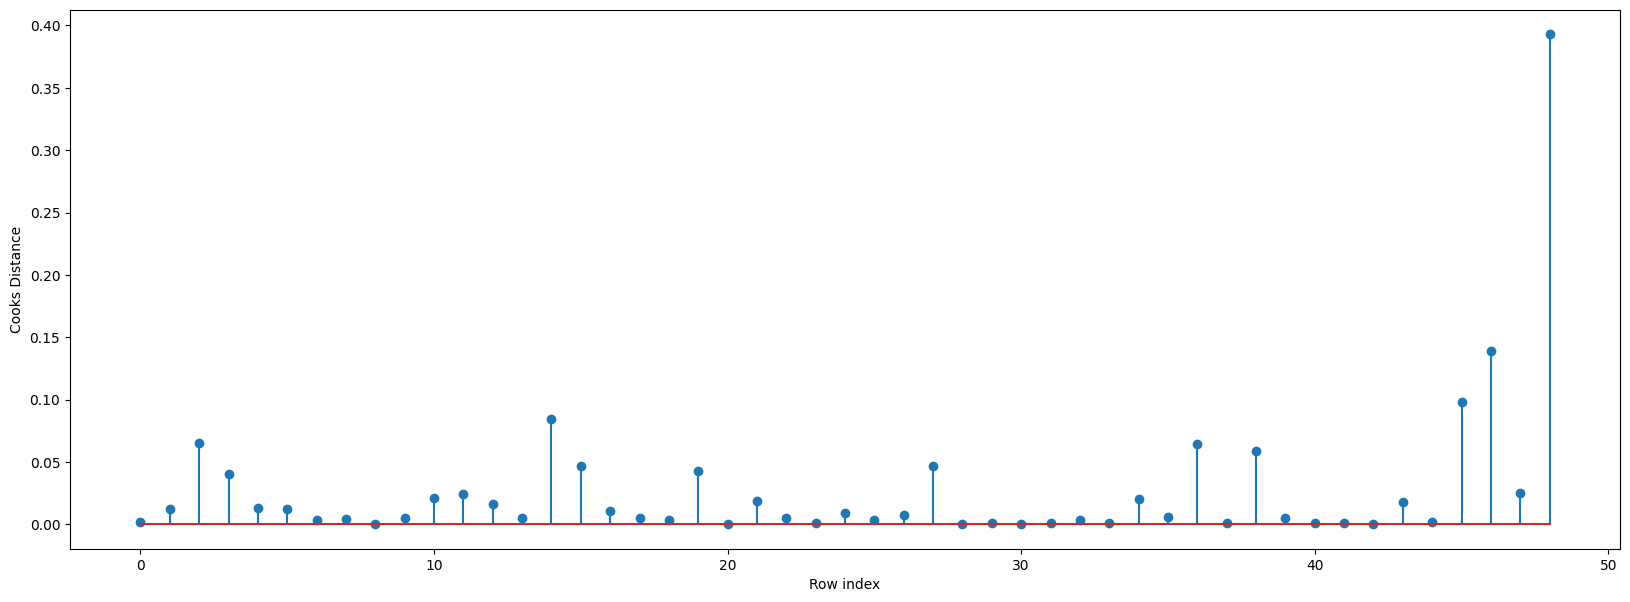

In [211]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.round(c,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [212]:
#index of the data points where c is more than .5
(np.argmax(c),np.max(c))

(48, 0.39275729637966406)

In [213]:
df2 = df1.drop(df1.index[[48]],axis=0)
df2.shape

(48, 6)

In [218]:
df2

,rndspend,admin,mktspend,profit,stfl,stny
0,165349,136897,471784,192261,0,1
1,162597,151377,443898,191792,0,0
2,153441,101145,407934,191050,1,0
3,144372,118671,383199,182901,0,1
4,142107,91391,366168,166187,1,0
5,131876,99814,362861,156991,0,1
6,134615,147198,127716,156122,0,0
7,130298,145530,323876,155752,1,0
8,120542,148718,311613,152211,0,1
9,123334,108679,304981,149759,0,0


In [219]:
df3 = df2.reset_index()
df4 = df3.drop(['index'],axis=1)
df4

,rndspend,admin,mktspend,profit,stfl,stny
0,165349,136897,471784,192261,0,1
1,162597,151377,443898,191792,0,0
2,153441,101145,407934,191050,1,0
3,144372,118671,383199,182901,0,1
4,142107,91391,366168,166187,1,0
5,131876,99814,362861,156991,0,1
6,134615,147198,127716,156122,0,0
7,130298,145530,323876,155752,1,0
8,120542,148718,311613,152211,0,1
9,123334,108679,304981,149759,0,0


In [220]:
model2 = smf.ols('profit~rndspend+admin+mktspend+stfl+stny', data = df4).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     217.6
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           7.01e-29
Time:                        21:38:33   Log-Likelihood:                -493.23
No. Observations:                  48   AIC:                             998.5
Df Residuals:                      42   BIC:                             1010.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.939e+04   6093.613      9.746      0.000    4.71e+04    7.17e+04
rndspend       0.7888      0.037     21.160      0.000       0.714       0.864
admin         -0.0621      0.045     -1.381      0.174      -0.153       0.029
mktspend       0.0179      0.014      1.275      0.209      -0.010       0.046
stfl       -1150.3637   2712.512     -0.424      0.674   -6624.435    4323.708
stny        -665.8191   2678.773     -0.249      0.805   -6071.801    4740.163
==============================================================================
Omnibus:                        0.267   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.875   Jarque-Bera (JB):                0.453
Skew:                           0.108   Prob(JB):                        0.797
Kurtosis:                       2.576   Cond. No.                     1.60e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [221]:
model2 = smf.ols('profit~rndspend+admin+mktspend+stfl', data = df4).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     278.1
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           4.05e-30
Time:                        21:38:58   Log-Likelihood:                -493.27
No. Observations:                  48   AIC:                             996.5
Df Residuals:                      43   BIC:                             1006.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.921e+04   5985.614      9.893      0.000    4.71e+04    7.13e+04
rndspend       0.7884      0.037     21.399      0.000       0.714       0.863
admin         -0.0629      0.044     -1.418      0.163      -0.152       0.027
mktspend       0.0177      0.014      1.278      0.208      -0.010       0.046
stfl        -809.7542   2315.223     -0.350      0.728   -5478.847    3859.338
==============================================================================
Omnibus:                        0.199   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.905   Jarque-Bera (JB):                0.394
Skew:                           0.083   Prob(JB):                        0.821
Kurtosis:                       2.588   Cond. No.                     1.59e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [222]:
model2 = smf.ols('profit~rndspend+admin+mktspend+stny', data = df4).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     277.3
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           4.30e-30
Time:                        21:39:07   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             996.7
Df Residuals:                      43   BIC:                             1006.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.912e+04   6001.248      9.851      0.000     4.7e+04    7.12e+04
rndspend       0.7896      0.037     21.418      0.000       0.715       0.864
admin         -0.0633      0.044     -1.422      0.162      -0.153       0.026
mktspend       0.0169      0.014      1.231      0.225      -0.011       0.045
stny         -91.8826   2289.632     -0.040      0.968   -4709.366    4525.600
==============================================================================
Omnibus:                        0.300   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.861   Jarque-Bera (JB):                0.485
Skew:                           0.059   Prob(JB):                        0.785
Kurtosis:                       2.522   Cond. No.                     1.59e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [223]:
model2 = smf.ols('profit~rndspend+admin+mktspend', data = df4).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           2.03e-31
Time:                        21:39:17   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.91e+04   5916.693      9.988      0.000    4.72e+04     7.1e+04
rndspend       0.7895      0.036     21.718      0.000       0.716       0.863
admin         -0.0634      0.044     -1.442      0.156      -0.152       0.025
mktspend       0.0169      0.014      1.249      0.218      -0.010       0.044
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [224]:
model2 = smf.ols('profit~rndspend+mktspend', data = df4).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     553.1
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           2.09e-32
Time:                        21:39:37   Log-Likelihood:                -494.44
No. Observations:                  48   AIC:                             994.9
Df Residuals:                      45   BIC:                             1000.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.127e+04   2376.271     21.574      0.000    4.65e+04    5.61e+04
rndspend       0.7694      0.034     22.636      0.000       0.701       0.838
mktspend       0.0241      0.013      1.899      0.064      -0.001       0.050
==============================================================================
Omnibus:                        0.079   Durbin-Watson:                   1.603
Prob(Omnibus):                  0.961   Jarque-Bera (JB):                0.282
Skew:                           0.016   Prob(JB):                        0.868
Kurtosis:                       2.626   Cond. No.                     5.79e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [225]:
model_influence = model2.get_influence()
(c,_) = model_influence.cooks_distance

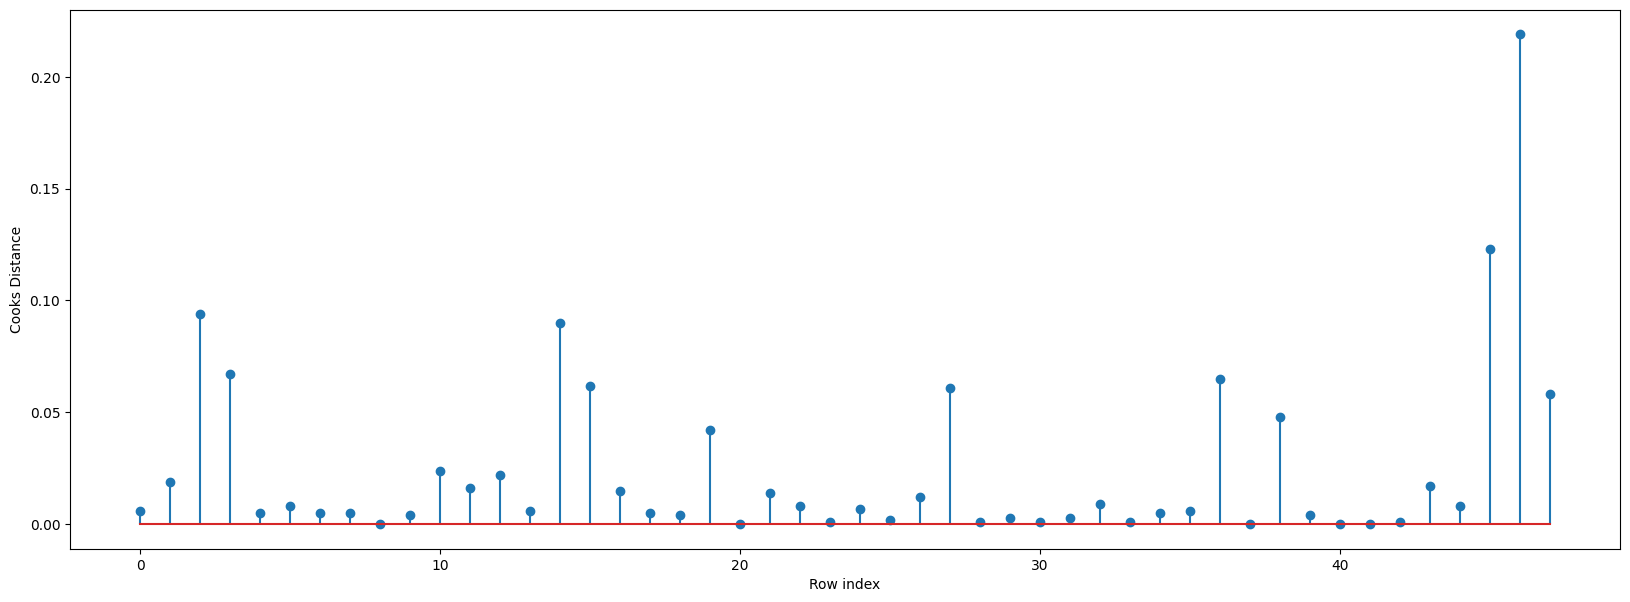

In [226]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df4)),np.round(c,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [227]:
#index of the data points
(np.argmax(c),np.max(c))

(46, 0.21871699000086664)

In [228]:
df5 = df4.drop(df4.index[[46]],axis=0)
df5

,rndspend,admin,mktspend,profit,stfl,stny
0,165349,136897,471784,192261,0,1
1,162597,151377,443898,191792,0,0
2,153441,101145,407934,191050,1,0
3,144372,118671,383199,182901,0,1
4,142107,91391,366168,166187,1,0
5,131876,99814,362861,156991,0,1
6,134615,147198,127716,156122,0,0
7,130298,145530,323876,155752,1,0
8,120542,148718,311613,152211,0,1
9,123334,108679,304981,149759,0,0


In [229]:
df6 = df5.reset_index()
df6

,index,rndspend,admin,mktspend,profit,stfl,stny
0,0,165349,136897,471784,192261,0,1
1,1,162597,151377,443898,191792,0,0
2,2,153441,101145,407934,191050,1,0
3,3,144372,118671,383199,182901,0,1
4,4,142107,91391,366168,166187,1,0
5,5,131876,99814,362861,156991,0,1
6,6,134615,147198,127716,156122,0,0
7,7,130298,145530,323876,155752,1,0
8,8,120542,148718,311613,152211,0,1
9,9,123334,108679,304981,149759,0,0


In [230]:
df7 = df6.drop(['index'],axis=1)
df7

,rndspend,admin,mktspend,profit,stfl,stny
0,165349,136897,471784,192261,0,1
1,162597,151377,443898,191792,0,0
2,153441,101145,407934,191050,1,0
3,144372,118671,383199,182901,0,1
4,142107,91391,366168,166187,1,0
5,131876,99814,362861,156991,0,1
6,134615,147198,127716,156122,0,0
7,130298,145530,323876,155752,1,0
8,120542,148718,311613,152211,0,1
9,123334,108679,304981,149759,0,0


In [233]:
model3 = smf.ols('profit~rndspend+mktspend+admin+stfl+stny', data = df7).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     204.7
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           7.33e-28
Time:                        21:51:42   Log-Likelihood:                -482.58
No. Observations:                  47   AIC:                             977.2
Df Residuals:                      41   BIC:                             988.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.845e+04   6101.936      9.579      0.000    4.61e+04    7.08e+04
rndspend       0.7646      0.042     18.276      0.000       0.680       0.849
mktspend       0.0254      0.015      1.669      0.103      -0.005       0.056
admin         -0.0525      0.045     -1.157      0.254      -0.144       0.039
stfl        -611.9051   2730.022     -0.224      0.824   -6125.296    4901.486
stny        -620.6062   2662.011     -0.233      0.817   -5996.646    4755.434
==============================================================================
Omnibus:                        0.364   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.834   Jarque-Bera (JB):                0.531
Skew:                           0.062   Prob(JB):                        0.767
Kurtosis:                       2.494   Cond. No.                     1.60e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [234]:
model3 = smf.ols('profit~rndspend+mktspend+admin+stfl', data = df7).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     261.7
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           4.34e-29
Time:                        21:51:59   Log-Likelihood:                -482.62
No. Observations:                  47   AIC:                             975.2
Df Residuals:                      42   BIC:                             984.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.829e+04   5991.095      9.729      0.000    4.62e+04    7.04e+04
rndspend       0.7643      0.041     18.489      0.000       0.681       0.848
mktspend       0.0253      0.015      1.681      0.100      -0.005       0.056
admin         -0.0532      0.045     -1.189      0.241      -0.144       0.037
stfl        -293.0986   2336.090     -0.125      0.901   -5007.519    4421.322
==============================================================================
Omnibus:                        0.313   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.855   Jarque-Bera (JB):                0.493
Skew:                           0.037   Prob(JB):                        0.782
Kurtosis:                       2.504   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [235]:
model3 = smf.ols('profit~rndspend+mktspend+admin+stny', data = df7).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     261.7
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           4.34e-29
Time:                        21:52:08   Log-Likelihood:                -482.61
No. Observations:                  47   AIC:                             975.2
Df Residuals:                      42   BIC:                             984.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.828e+04   5986.364      9.736      0.000    4.62e+04    7.04e+04
rndspend       0.7644      0.041     18.486      0.000       0.681       0.848
mktspend       0.0251      0.015      1.675      0.101      -0.005       0.055
admin         -0.0528      0.045     -1.178      0.246      -0.143       0.038
stny        -321.7362   2277.779     -0.141      0.888   -4918.479    4275.007
==============================================================================
Omnibus:                        0.418   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.811   Jarque-Bera (JB):                0.565
Skew:                           0.036   Prob(JB):                        0.754
Kurtosis:                       2.468   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [236]:
model3 = smf.ols('profit~rndspend+mktspend+admin', data = df7).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     357.1
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           2.12e-30
Time:                        21:52:19   Log-Likelihood:                -482.62
No. Observations:                  47   AIC:                             973.2
Df Residuals:                      43   BIC:                             980.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.823e+04   5905.343      9.860      0.000    4.63e+04    7.01e+04
rndspend       0.7642      0.041     18.704      0.000       0.682       0.847
mktspend       0.0251      0.015      1.696      0.097      -0.005       0.055
admin         -0.0532      0.044     -1.202      0.236      -0.142       0.036
==============================================================================
Omnibus:                        0.366   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.833   Jarque-Bera (JB):                0.530
Skew:                           0.028   Prob(JB):                        0.767
Kurtosis:                       2.483   Cond. No.                     1.57e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [237]:
model3 = smf.ols('profit~rndspend+mktspend', data = df7).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     529.6
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           1.65e-31
Time:                        21:52:31   Log-Likelihood:                -483.40
No. Observations:                  47   AIC:                             972.8
Df Residuals:                      44   BIC:                             978.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.171e+04   2358.710     21.924      0.000     4.7e+04    5.65e+04
rndspend       0.7439      0.037     19.902      0.000       0.669       0.819
mktspend       0.0323      0.014      2.376      0.022       0.005       0.060
==============================================================================
Omnibus:                        0.086   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.958   Jarque-Bera (JB):                0.292
Skew:                           0.000   Prob(JB):                        0.864
Kurtosis:                       2.614   Cond. No.                     5.76e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [238]:
###'admin' has much affect on 'mktspend'. So, whenever included in the model, showing mktspend as insignificant. if admin removed and model with rndspend and mktspend is showing good result. 

In [239]:
### applying tranformations not affecting the model much

In [240]:
df

,rndspend,admin,mktspend,profit,stfl,stny
0,165349,136897,471784,192261,0,1
1,162597,151377,443898,191792,0,0
2,153441,101145,407934,191050,1,0
3,144372,118671,383199,182901,0,1
4,142107,91391,366168,166187,1,0
5,131876,99814,362861,156991,0,1
6,134615,147198,127716,156122,0,0
7,130298,145530,323876,155752,1,0
8,120542,148718,311613,152211,0,1
9,123334,108679,304981,149759,0,0


In [252]:
# check with new data where rndspend and mktspend are having no zero values

In [261]:
dfo = df[(df['rndspend']!=0) & (df['mktspend']!=0)]
print(dfo)

    rndspend   admin  mktspend  profit  stfl  stny
0     165349  136897    471784  192261     0     1
1     162597  151377    443898  191792     0     0
2     153441  101145    407934  191050     1     0
3     144372  118671    383199  182901     0     1
4     142107   91391    366168  166187     1     0
5     131876   99814    362861  156991     0     1
6     134615  147198    127716  156122     0     0
7     130298  145530    323876  155752     1     0
8     120542  148718    311613  152211     0     1
9     123334  108679    304981  149759     0     0
10    101913  110594    229160  146121     1     0
11    100671   91790    249744  144259     0     0
12     93863  127320    249839  141585     1     0
13     91992  135495    252664  134307     0     0
14    119943  156547    256512  132602     1     0
15    114523  122616    261776  129917     0     1
16     78013  121597    264346  126992     0     0
17     94657  145077    282574  125370     0     1
18     91749  114175    294919 

In [244]:
modelo = smf.ols('profit~rndspend+mktspend+admin+stfl+stny',data=dfo).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     198.7
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           3.96e-27
Time:                        22:00:50   Log-Likelihood:                -472.52
No. Observations:                  46   AIC:                             957.0
Df Residuals:                      40   BIC:                             968.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.977e+04   6126.155      9.757      0.000    4.74e+04    7.22e+04
rndspend       0.7751      0.039     19.828      0.000       0.696       0.854
mktspend       0.0210      0.015      1.376      0.176      -0.010       0.052
admin         -0.0576      0.045     -1.276      0.209      -0.149       0.034
stfl       -1752.6396   2744.953     -0.638      0.527   -7300.397    3795.118
stny       -1597.2889   2764.838     -0.578      0.567   -7185.235    3990.657
==============================================================================
Omnibus:                        0.445   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.801   Jarque-Bera (JB):                0.597
Skew:                           0.173   Prob(JB):                        0.742
Kurtosis:                       2.562   Cond. No.                     1.61e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [245]:
modelo = smf.ols('profit~rndspend+mktspend+admin+stfl',data=dfo).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           2.74e-28
Time:                        22:01:11   Log-Likelihood:                -472.71
No. Observations:                  46   AIC:                             955.4
Df Residuals:                      41   BIC:                             964.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.937e+04   6035.723      9.836      0.000    4.72e+04    7.16e+04
rndspend       0.7760      0.039     20.030      0.000       0.698       0.854
mktspend       0.0201      0.015      1.334      0.190      -0.010       0.051
admin         -0.0597      0.045     -1.338      0.188      -0.150       0.030
stfl        -931.1177   2328.745     -0.400      0.691   -5634.113    3771.878
==============================================================================
Omnibus:                        0.240   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.887   Jarque-Bera (JB):                0.429
Skew:                           0.104   Prob(JB):                        0.807
Kurtosis:                       2.575   Cond. No.                     1.59e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [246]:
modelo = smf.ols('profit~rndspend+mktspend+admin+stny',data=dfo).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     251.9
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           2.85e-28
Time:                        22:01:19   Log-Likelihood:                -472.75
No. Observations:                  46   AIC:                             955.5
Df Residuals:                      41   BIC:                             964.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.933e+04   6042.816      9.819      0.000    4.71e+04    7.15e+04
rndspend       0.7772      0.039     20.098      0.000       0.699       0.855
mktspend       0.0193      0.015      1.294      0.203      -0.011       0.050
admin         -0.0596      0.045     -1.333      0.190      -0.150       0.031
stny        -682.7594   2347.763     -0.291      0.773   -5424.163    4058.644
==============================================================================
Omnibus:                        0.433   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.805   Jarque-Bera (JB):                0.582
Skew:                           0.085   Prob(JB):                        0.748
Kurtosis:                       2.476   Cond. No.                     1.59e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [247]:
modelo = smf.ols('profit~rndspend+mktspend+admin',data=dfo).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     343.4
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           1.47e-29
Time:                        22:01:29   Log-Likelihood:                -472.80
No. Observations:                  46   AIC:                             953.6
Df Residuals:                      42   BIC:                             960.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.921e+04   5963.292      9.930      0.000    4.72e+04    7.12e+04
rndspend       0.7771      0.038     20.320      0.000       0.700       0.854
mktspend       0.0193      0.015      1.304      0.199      -0.011       0.049
admin         -0.0603      0.044     -1.365      0.179      -0.149       0.029
==============================================================================
Omnibus:                        0.344   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.842   Jarque-Bera (JB):                0.518
Skew:                           0.071   Prob(JB):                        0.772
Kurtosis:                       2.500   Cond. No.                     1.59e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [248]:
modelo = smf.ols('profit~rndspend+mktspend',data=dfo).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     504.0
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           1.43e-30
Time:                        22:01:48   Log-Likelihood:                -473.80
No. Observations:                  46   AIC:                             953.6
Df Residuals:                      43   BIC:                             959.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.186e+04   2581.274     20.090      0.000    4.67e+04    5.71e+04
rndspend       0.7581      0.036     21.081      0.000       0.686       0.831
mktspend       0.0258      0.014      1.828      0.074      -0.003       0.054
==============================================================================
Omnibus:                        0.069   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.966   Jarque-Bera (JB):                0.268
Skew:                           0.030   Prob(JB):                        0.875
Kurtosis:                       2.631   Cond. No.                     6.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [249]:
modelo = smf.ols('profit~rndspend+admin',data=dfo).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     506.0
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           1.32e-30
Time:                        22:02:07   Log-Likelihood:                -473.71
No. Observations:                  46   AIC:                             953.4
Df Residuals:                      43   BIC:                             958.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     6.3e+04   5252.143     11.994      0.000    5.24e+04    7.36e+04
rndspend       0.8141      0.026     31.507      0.000       0.762       0.866
admin         -0.0790      0.042     -1.875      0.068      -0.164       0.006
==============================================================================
Omnibus:                        0.312   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.856   Jarque-Bera (JB):                0.494
Skew:                           0.084   Prob(JB):                        0.781
Kurtosis:                       2.521   Cond. No.                     7.16e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [250]:
modelo = smf.ols('profit~mktspend+admin',data=dfo).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     29.17
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           9.89e-09
Time:                        22:02:37   Log-Likelihood:                -527.60
No. Observations:                  46   AIC:                             1061.
Df Residuals:                      43   BIC:                             1067.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.917e+04   1.88e+04      1.553      0.128   -8721.716    6.71e+04
mktspend       0.2420      0.032      7.516      0.000       0.177       0.307
admin          0.2674      0.134      2.000      0.052      -0.002       0.537
==============================================================================
Omnibus:                       10.162   Durbin-Watson:                   0.940
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               12.877
Skew:                          -0.690   Prob(JB):                      0.00160
Kurtosis:                       5.194   Cond. No.                     1.47e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [251]:
modelo = smf.ols('profit~rndspend',data=dfo).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     953.8
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           1.84e-31
Time:                        22:02:52   Log-Likelihood:                -475.52
No. Observations:                  46   AIC:                             955.0
Df Residuals:                      44   BIC:                             958.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.411e+04   2328.706     23.236      0.000    4.94e+04    5.88e+04
rndspend       0.8046      0.026     30.884      0.000       0.752       0.857
==============================================================================
Omnibus:                        0.106   Durbin-Watson:                   1.492
Prob(Omnibus):                  0.948   Jarque-Bera (JB):                0.311
Skew:                           0.038   Prob(JB):                        0.856
Kurtosis:                       2.604   Cond. No.                     1.85e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# predicting new data


In [254]:
new_data = pd.DataFrame({'rndspend': 100000, 'admin': 100000, 'mktspend':250000 }, index=[1])

In [265]:
modelo.predict(new_data)

1    134570.970351
dtype: float64

In [266]:
modelo.predict(df_new.iloc[0:5])

0    187152.112443
1    184937.796951
2    177570.692069
3    170273.589165
4    168451.123836
dtype: float64

In [267]:
pred_y = modelo.predict(df_new)

In [268]:
pred_y

0     187152.112443
1     184937.796951
2     177570.692069
3     170273.589165
4     168451.123836
5     160219.051964
6     162422.907389
7     158949.360887
8     151099.483731
9     153345.984040
10    136110.209281
11    135110.870677
12    129633.014621
13    128127.569751
14    150617.516079
15    146256.473214
16    116879.780415
17    130271.883262
18    127932.046980
19    123643.419957
20    115463.648415
21    117182.317706
22    113646.010808
23    108446.553430
24    116100.103194
25    106138.901966
26    114719.374494
27    112127.692010
28    107254.910536
29    106896.049814
30    103990.565352
31    103300.201002
32    105128.298675
33     98759.727776
34     91464.234114
35     91132.730486
36     77171.760978
37     89567.743702
38     70385.592063
39     85133.480377
40     77244.981439
41     76551.398607
42     73130.152434
43     66584.565035
44     71952.992709
45     54913.545341
46     55167.000784
47     54108.924886
48     54545.029172
49     54108.924886


In [269]:
df_new['profit']

0     192261
1     191792
2     191050
3     182901
4     166187
5     156991
6     156122
7     155752
8     152211
9     149759
10    146121
11    144259
12    141585
13    134307
14    132602
15    129917
16    126992
17    125370
18    124266
19    122776
20    118474
21    111313
22    110352
23    108733
24    108552
25    107404
26    105733
27    105008
28    103282
29    101004
30     99937
31     97483
32     97427
33     96778
34     96712
35     96479
36     90708
37     89949
38     81229
39     81005
40     78239
41     77798
42     71498
43     69758
44     65200
45     64926
46     49490
47     42559
48     35673
49     14681
Name: profit, dtype: int32

In [275]:
rmse = np.sqrt(np.mean((df_new['profit'] - pred_y) ** 2))

print("RMSE:", rmse)

RMSE: 9602.933515318538
